This is my approach to linear regression problem. 

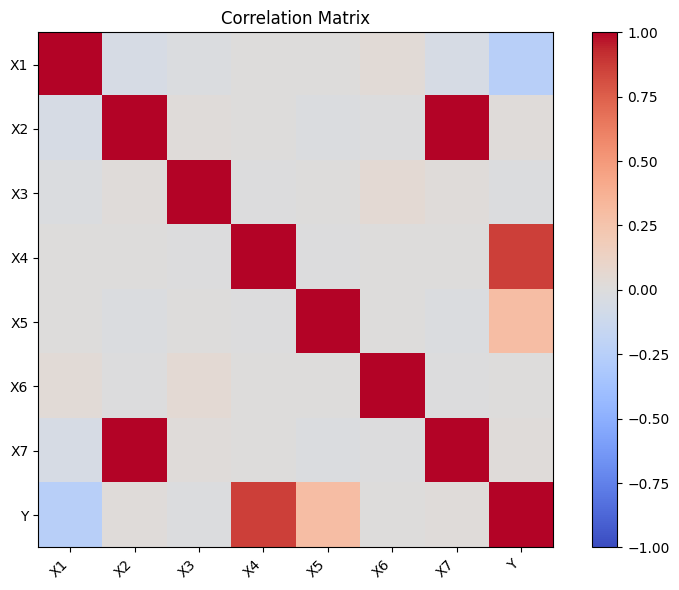

In [1]:
import numpy as np
from linear_regression import filename, LinearRegressionModel, StopCondition, RidgeRegressionFunction, Uninomial, \
    QuadraticLossFunction, Linear, LassoRegressionFunction, Zeros, Custom, Gaussian

model = LinearRegressionModel(filename, True)
model.corr()

In [69]:
model.set_parameters(loss_function=LassoRegressionFunction(25), base_function=Custom())
model.set_parameters(eta=0.001, stop=0.01, rep_count=14500, condition=StopCondition.Both)
model.set_parameters(mini_batch=True   , batch_size=64, print_c=200)

model.linear_regression()

200: Gradient: 6046.993628544875, MSE: 430754.7998227803
400: Gradient: 4389.044864340272, MSE: 229406.31128617443
600: Gradient: 6763.776087704209, MSE: 173073.15842078708
800: Gradient: 4401.948306341931, MSE: 146720.88797311846
1000: Gradient: 2033.0523289578023, MSE: 125505.71392190654
1200: Gradient: 944.3889238840036, MSE: 114377.78016560589
1400: Gradient: 1167.0309164668743, MSE: 107253.84711381576
1600: Gradient: 1682.7525703798688, MSE: 102029.6612556717
1800: Gradient: 1366.4762509753564, MSE: 96133.03413179942
2000: Gradient: 2046.9218322089075, MSE: 93094.64728043744
2200: Gradient: 2307.2811973684584, MSE: 90569.01180416104
2400: Gradient: 2491.700727331803, MSE: 91094.96978900174
2600: Gradient: 1961.6444579232991, MSE: 91771.81382087627
2800: Gradient: 1607.6832685680665, MSE: 87931.93933709762
3000: Gradient: 335.93997567125416, MSE: 86253.90400821337
3200: Gradient: 2179.166013254597, MSE: 84756.6595914996
3400: Gradient: 724.1205072545812, MSE: 84324.92576507015
3600

[np.float64(847.5762951073694),
 np.float64(122.6262951073671),
 np.float64(-9.369463097210172),
 np.float64(-0.7603286590590572),
 np.float64(0.035246205745790696),
 np.float64(654.0429919625692),
 np.float64(111.09206437451994),
 np.float64(-0.07819209964429098),
 np.float64(-1.056483854251633)]

In [16]:
from random import randrange
i = randrange(0, len(model.test) - 1, 1)
p = model.prediction([1, *[model.test[i][j] for j in range(len(model.test[0]) - 1)]])
a = model.test[i][-1]
np.set_printoptions(precision=2)
print(f"prediction: {"%0.2f" %  p}. actual: {"%0.2f" %  a}, error = {"%0.2f" % (abs(p - a) / a * 100)}%")

prediction: 1023.82. actual: 1867.46, error = 45.18%


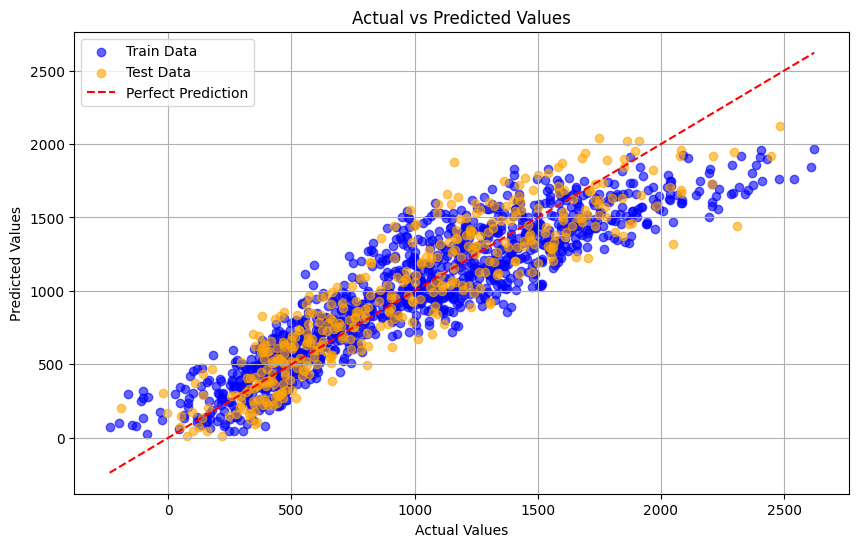

In [70]:
model.print_results()

In [71]:
model.MSE()

Train Set MSE: 50608.76626146268
Test Set MSE: 47194.99178594231


In [4]:
#print(np.mean([quadratic_loss(model, train[i]) ** 2 for i in range(len(train))]))
# print(linear_regression.quadratic_loss(model, test[0]))